In [1]:
from math import factorial
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy.special import eval_hermite as hermite
from PIL import Image
import pandas as pd
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1 import make_axes_locatable

import finesse
import scipy.fftpack as sfft
from finesse.gaussian import HGMode

finesse.configure(plotting=True)

In [2]:
d = 16

phase_BG = np.ones((1152, 1920))
darray = np.arange(d)/d*2*np.pi

for i in np.arange(0, 1920, d):
    for j in np.arange(1152):
        phase_BG[j, i:i+d] = darray
print(len(np.arange(0, 1920, d)))

120


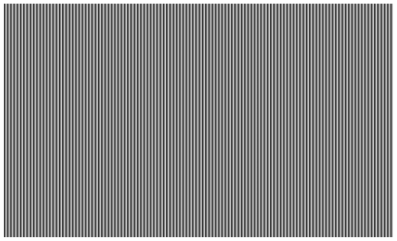

In [3]:
fig, ax = plt.subplots(figsize=(7, 6))

ax.imshow(phase_BG, cmap="gray", aspect='equal')
ax.axis("off");
# fig.savefig('./1009/SLM_BG.png', bbox_inches='tight', dpi=120, pad_inches=0.01);

In [196]:
l = 9.2e-6
d = 16
cx = int(1920/2)
cy = int(1152/2)
wx0 = 1310e-6
wy0 = 1150e-6
def gaussian(i, j, wx=1, wy=1):
    wx = wx*wx0/l
    wy = wy*wy0/l
    i = i-cx
    j = j-cy
    # gauss = np.exp((-(i/wx)**2-(j/wy)**2)*2)
    gauss = np.exp((-(i/wx)**2-(j/wy)**2))
    return gauss*np.arange(d)/d*2*np.pi

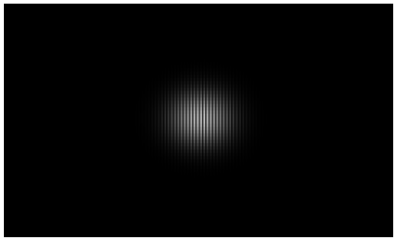

In [197]:
def phase_image_w(wx=1, wy=1):
    phase_d16 = np.zeros((1152, 1920))
    
    for i in np.arange(0, 1920, d):
        for j in np.arange(0, 1152, d):
            # print(i, j)
            darray = gaussian(i, j, wx=wx, wy=wy)
            phase_d16[j:j+d, i:i+d] = darray

    return phase_d16


fig, ax = plt.subplots(figsize=(7, 6))

ax.imshow(phase_image_w(), cmap="gray", aspect='equal')
ax.axis("off");
# fig.savefig('./1009/SLM_w_contour.png', bbox_inches='tight', dpi=120, pad_inches=0.01);

In [207]:
l = 9.2e-6
d = 16
cx = int(1920/2)
cy = int(1152/2)
wx0 = 1310e-6
wy0 = 1150e-6

def hump_1D(offset=0.8):
    x = np.linspace(-1, 1, 100)
    val = np.exp(-(x-offset)**2) + np.exp(-(x+offset)**2)
    return val

def hump_2D(offset=0.8):
    x = y = np.linspace(-1, 1, 100)
    norm = hump_1D(offset).max()
    xx, yy = np.meshgrid(x, y)
    val = np.exp(-((xx**2+yy**2)**0.5+offset)**2) + np.exp(-((xx**2+yy**2)**0.5-offset)**2)/norm
    return val
    
def camel_hump(i, j, wx=1, wy=1, offset=0.8):
    wx = wx*wx0/l
    wy = wy*wy0/l
    i = i-cx
    j = j-cy
    x = i/wx
    y = j/wy
    norm = hump_1D(offset).max()
    hump = np.exp(-((x**2+y**2)**0.5+offset)**2) + np.exp(-((x**2+y**2)**0.5-offset)**2)
    hump = hump/norm
    return hump*np.arange(d)/d*2*np.pi

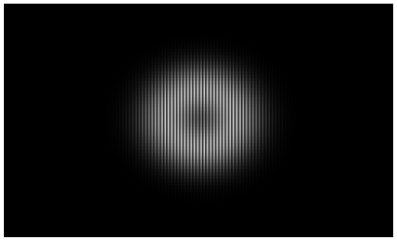

In [208]:
def phase_image_w_CH(wx=1, wy=1, offset=0.8):
    phase_d16 = np.zeros((1152, 1920))
    
    for i in np.arange(0, 1920, d):
        for j in np.arange(0, 1152, d):
            # print(i, j)
            darray = camel_hump(i, j, wx=wx, wy=wy, offset=offset)
            phase_d16[j:j+d, i:i+d] = darray

    return phase_d16


fig, ax = plt.subplots(figsize=(7, 6))

ax.imshow(phase_image_w_CH(offset=1.1), cmap="gray", aspect='equal')
ax.axis("off");
# fig.savefig('./1010/SLM_w_contour.png', bbox_inches='tight', dpi=120, pad_inches=0.01);

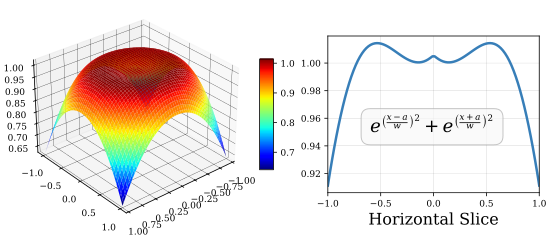

In [118]:
hump_contour_data = hump_2D()
x = y = np.linspace(-1, 1, 100)
xx, yy = np.meshgrid(x, y)

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

fig = plt.figure(figsize=(10, 4))

gs = fig.add_gridspec(7, 5)
ax = fig.add_subplot(gs[:, :3], projection='3d')
ax2 = fig.add_subplot(gs[1:6, 3:])

# ax = fig.add_subplot(1, 2, 1, projection='3d')

surf = ax.plot_surface(xx, yy, hump_contour_data, cmap="jet",
                       linewidth=0, antialiased=False)

ax.view_init(elev=30, azim=50)

# ax.zaxis.set_major_formatter('{x:.02f}')

# ax2 = fig.add_subplot(1, 2, 2)

ax2.plot(x, hump_contour_data[50,:], lw=2.5, color=CB_color_cycle[0])

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=8)

ax2.set_xlabel("Horizontal Slice", fontsize=16,)

ax2.text(
    -0.6, 0.95,  # Coordinates where you want to place the text (adjust as needed)
    r'$e^{\left(\frac{x-a}{w}\right)^2} + e^{\left(\frac{x+a}{w}\right)^2}$',  # Text content
    fontsize=18, 
    bbox=dict(
        edgecolor='#adadad', 
        facecolor='#f9f9f9', 
        boxstyle='round,pad=0.5',
        alpha=0.7, 
    )
)

plt.show()
# fig.savefig('./1010/Camel_hump_contour.png', bbox_inches='tight', dpi=300, pad_inches=0.01);

(26.34032386983328+0j)
1.0
(6.002565312520481e-10+0j)


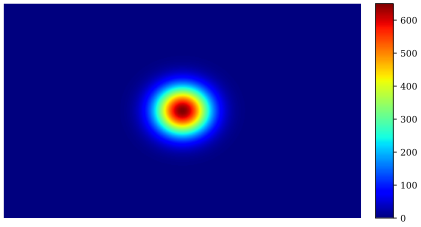

In [105]:
q_x0 = 1j*np.pi*wx0**2/(1064e-9)
q_y0 = 1j*np.pi*wy0**2/(1064e-9)
HG00_0 = HGMode((q_y0, q_x0), n=0, m=0)
x = np.arange(-cx, cx)*l
y = np.arange(-cy, cy)*l
HG00_0_data = HG00_0.unm(y, x)

fig, ax = plt.subplots(figsize=(7,5))

im = ax.imshow(np.abs(HG00_0_data), cmap="jet") #norm=LogNorm(vmin=0, vmax=20))
plt.grid(False)
plt.axis("off")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
cbar = fig.colorbar(im, cax=cax,);
# fig.savefig('./1009/HG00_SLM.png', bbox_inches='tight', dpi=120, pad_inches=0.01);

In [27]:
np.abs(HG_00_fourier).max()

8.286531472546182

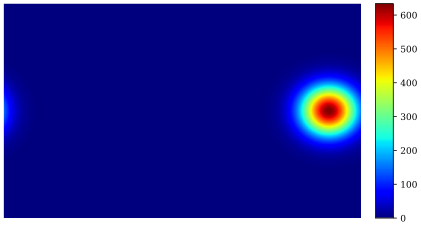

In [110]:
field_data = HG00_0_data*np.exp(1j*phase_BG)

freqxs = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(field_data.shape[1], d=x[1]-x[0]))
freqxs = freqxs.reshape(1,-1)
freqys = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(field_data.shape[0], d=y[1]-y[0]))
freqys = freqys.reshape(-1,1)
HG_00_fourier = np.fft.fftshift(np.fft.fft2(field_data, norm='forward'))
k = 2*np.pi/(1064e-9)
data = HG_00_fourier*np.exp(1j*(k**2-freqxs**2-freqys**2)**0.5*1)
HG_00_Propagated = np.fft.ifft2(data, norm='forward')

fig, ax = plt.subplots(figsize=(7,5))

im = ax.imshow(np.abs(HG_00_Propagated), cmap="jet") #norm=LogNorm(vmin=0, vmax=20))
plt.grid(False)
plt.axis("off")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
cbar = fig.colorbar(im, cax=cax,);
# fig.savefig('./1009/HG00_SLM_BG.png', bbox_inches='tight', dpi=120, pad_inches=0.01);

In [349]:
x = np.arange(-cx, cx)*l
y = np.arange(-cy, cy)*l
def beam_size_modulation(wx, wy, d=1, plot=False):
    phase_d16 = phase_image_w(wx=wx, wy=wy)
    field_data = HG00_0_data*np.exp(1j*phase_d16)
    
    freqxs = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(field_data.shape[1], d=x[1]-x[0]))
    freqxs = freqxs.reshape(1,-1)
    freqys = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(field_data.shape[0], d=y[1]-y[0]))
    freqys = freqys.reshape(-1,1)
    HG_00_fourier = np.fft.fftshift(np.fft.fft2(field_data, norm='forward'))
    k = 2*np.pi/(1064e-9)
    data = HG_00_fourier*np.exp(1j*(k**2-freqxs**2-freqys**2)**0.5*d)
    HG_00_Propagated = np.fft.ifft2(data, norm='forward')
    if plot:
        fig, ax = plt.subplots(figsize=(7,5))

        im = ax.imshow(np.abs(HG_00_Propagated), cmap="jet") #norm=LogNorm(vmin=0, vmax=20))
        plt.grid(False)
        plt.axis("off")
        
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.2)
        cbar = fig.colorbar(im, cax=cax,)
        # fig.savefig('./1010/Gaussian_Contour.png', bbox_inches='tight', dpi=120, pad_inches=0.01);

    ydata_x = np.abs(HG_00_Propagated)[576, 1600:]
    ydata_y = np.abs(HG_00_Propagated)[:, 1754]
    xdata_x = x[1600:]
    xdata_y = y[:]
    
    popt_x, pcov = curve_fit(func_gauss, xdata_x, ydata_x, p0=[1000, 0.007, wx0, 10])
    popt_y, pcov = curve_fit(func_gauss, xdata_y, ydata_y, p0=[1000, 0, wy0, 10])
 
    return np.abs(HG_00_Propagated), popt_x[2], popt_y[2]

0.049382062284390946

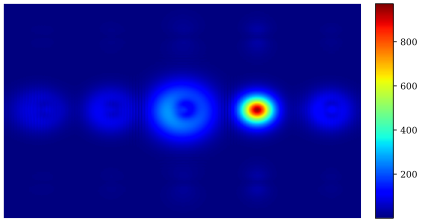

In [350]:
propagated, wx, wy = beam_size_modulation(wx=1, wy=1, d=0.5, plot=True)
wx

In [200]:
dwell = 0.02
ws = 0.1*np.sin(2*np.pi*np.arange(0, 1, dwell)) + 1
beamsizexs = []
beamsizeys = []
for w in ws:
    _, beamsizex, beamsizey = beam_size_modulation(wx=w, wy=w)
    beamsizexs.append(beamsizex)
    beamsizeys.append(beamsizey)
    print("#", end=" ")

beamsizexs = np.array(beamsizexs)
beamsizeys = np.array(beamsizeys)

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

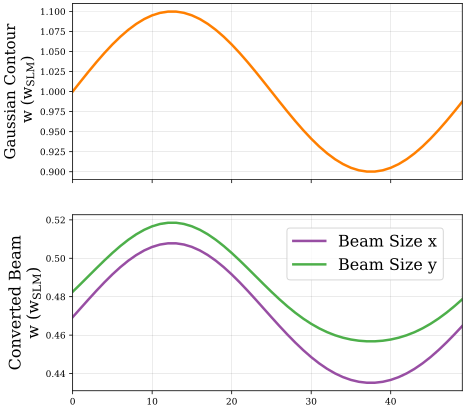

In [201]:
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7, 7))

ax.plot(ws, lw=2.5, color=CB_color_cycle[1], label="Gaussian Waist Size")

ax2.plot(beamsizexs/wx0, lw=2.5, color=CB_color_cycle[5], label="Beam Size x")
ax2.plot(beamsizeys/wy0, lw=2.5, color=CB_color_cycle[2], label="Beam Size y")

ax.set_ylabel("Gaussian Contour\n w ($\mathrm{w_{SLM}}$)", fontsize=15, labelpad=5)
ax2.set_ylabel("Converted Beam\nw ($\mathrm{w_{SLM}}$)", fontsize=16,)

handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
# handles1.extend(handles2)
# labels1.extend(labels2)
legend = plt.legend(handles2, labels2, fontsize=16, ncols=1, loc=(0.55, 0.63))
# fig.savefig('./1009/Beamsize_modulation.png', bbox_inches='tight', dpi=120, pad_inches=0.01);

In [187]:
def func_gauss(x, a, x0, w, c):
    return a * np.exp(-((x-x0)/w)**2) + c

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

Text(0, 0.5, 'Converted Beam\nw ($\\mathrm{w_{SLM}}$)')

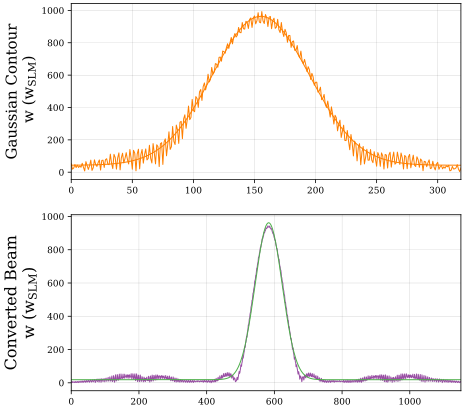

In [190]:
index_y = 1754 # = func_gauss(xdata, *popt).argmax() + 1600
ydata_x = propagated[576, 1600:]
ydata_y = propagated[:, 1754]
xdata_x = x[1600:]
xdata_y = y[:]

popt_x, pcov = curve_fit(func_gauss, xdata_x, ydata_x, p0=[1000, 0.007, wx0, 10])
popt_y, pcov = curve_fit(func_gauss, xdata_y, ydata_y, p0=[1000, 0, wy0, 10])

# plt.plot(ydata_x, color="m")
# plt.plot(ydata_y, color="r")
# plt.plot(func_gauss(xdata_x, *popt_x), color="lightgreen")
# plt.plot(func_gauss(xdata_y, *popt_y), color="k")
# print(popt[2])

fig, (ax, ax2) = plt.subplots(2, 1, sharex=False, figsize=(7, 7))

ax.plot(ydata_x, lw=1, color=CB_color_cycle[1], label="Gaussian Waist Size")
ax.plot(func_gauss(xdata_x, *popt_x), lw=1, color=CB_color_cycle[1], label="Gaussian Waist Size")

ax2.plot(ydata_y, lw=1, color=CB_color_cycle[5], label="Beam Size x")
ax2.plot(func_gauss(xdata_y, *popt_y), lw=1, color=CB_color_cycle[2], label="Beam Size y")

ax.set_ylabel("Gaussian Contour\n w ($\mathrm{w_{SLM}}$)", fontsize=15, labelpad=5)
ax2.set_ylabel("Converted Beam\nw ($\mathrm{w_{SLM}}$)", fontsize=16,)

In [351]:
x = np.arange(-cx, cx)*l
y = np.arange(-cy, cy)*l
def beam_size_modulation_camelHump(wx, wy, d=1, offset=0.8, plot=False):
    phase_d16 = phase_image_w_CH(wx=wx, wy=wy, offset=offset)
    field_data = HG00_0_data*np.exp(1j*phase_d16)
    
    freqxs = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(field_data.shape[1], d=x[1]-x[0]))
    freqxs = freqxs.reshape(1,-1)
    freqys = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(field_data.shape[0], d=y[1]-y[0]))
    freqys = freqys.reshape(-1,1)
    HG_00_fourier = np.fft.fftshift(np.fft.fft2(field_data, norm='forward'))
    k = 2*np.pi/(1064e-9)
    data = HG_00_fourier*np.exp(1j*(k**2-freqxs**2-freqys**2)**0.5*d)
    HG_00_Propagated = np.fft.ifft2(data, norm='forward')
    if plot:
        fig, ax = plt.subplots(figsize=(7,5))

        im = ax.imshow(np.abs(HG_00_Propagated), cmap="jet") #norm=LogNorm(vmin=0, vmax=20))
        plt.grid(False)
        plt.axis("off")
        
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.2)
        cbar = fig.colorbar(im, cax=cax,)
        # fig.savefig('./1010/CH_Contour.png', bbox_inches='tight', dpi=120, pad_inches=0.01);
        
    # if wx < 1.3:
    #     ydata_x = np.abs(HG_00_Propagated)[576, 1347-300:1347+300]
    #     ydata_y = np.abs(HG_00_Propagated)[576-220:576+220, 1347]
    #     xdata_x = x[1347-300:1347+300]
    #     xdata_y = y[576-220:576+220]
    # else:
    #     ydata_x = np.abs(HG_00_Propagated)[576, :]
    #     ydata_y = np.abs(HG_00_Propagated)[:, 1347]
    #     xdata_x = x[:]
    #     xdata_y = y[:]
    ydata_x = np.abs(HG_00_Propagated)[576, :]
    ydata_y = np.abs(HG_00_Propagated)[:, 1347]
    xdata_x = x[:]
    xdata_y = y[:]
    popt_x, pcov = curve_fit(func_gauss, xdata_x, ydata_x, p0=[600, 0.0035, wx0, 10])
    popt_y, pcov = curve_fit(func_gauss, xdata_y, ydata_y, p0=[600, 0, wy0, 10])

    return np.abs(HG_00_Propagated), popt_x[2], popt_y[2]

0.0013078782037586737

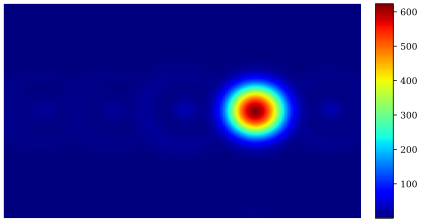

In [377]:
w = 1.4
propagated, wx, wy = beam_size_modulation_camelHump(wx=w, wy=w, d=0.5, plot=True)
wx

In [378]:
propagated[576, :].argmax() 

1347

0.0013078782047806793 0.0011718387958233323


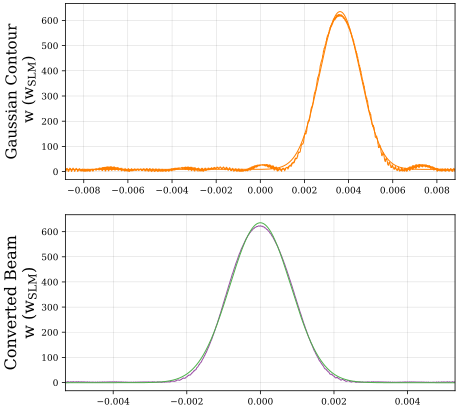

In [379]:
index_y = 1347 # = func_gauss(xdata, *popt).argmax() + 1600
# ydata_x = propagated[576, 1347-300:1347+300]
# ydata_y = propagated[576-220:576+220, 1347]
# xdata_x = x[1347-300:1347+300]
# xdata_y = y[576-220:576+220]

ydata_x = propagated[576, :]
ydata_y = propagated[:, 1347]
xdata_x = x[:]
xdata_y = y[:]

popt_x, pcov = curve_fit(func_gauss, xdata_x, ydata_x, p0=[600, 0.0035, wx0, 0])
popt_y, pcov = curve_fit(func_gauss, xdata_y, ydata_y, p0=[600, 0, wy0, 0])

fig, (ax, ax2) = plt.subplots(2, 1, sharex=False, figsize=(7, 7))

ax.plot(xdata_x, ydata_x, lw=1, color=CB_color_cycle[1], label="Gaussian Waist Size")
ax.plot(xdata_x, func_gauss(xdata_x, *popt_x), lw=1, color=CB_color_cycle[1], label="Gaussian Waist Size")

ax2.plot(xdata_y, ydata_y, lw=1, color=CB_color_cycle[5], label="Beam Size x")
ax2.plot(xdata_y, func_gauss(xdata_y, *popt_y), lw=1, color=CB_color_cycle[2], label="Beam Size y")

ax.set_ylabel("Gaussian Contour\n w ($\mathrm{w_{SLM}}$)", fontsize=15, labelpad=5)
ax2.set_ylabel("Converted Beam\nw ($\mathrm{w_{SLM}}$)", fontsize=16,);
print(popt_x[2], popt_y[2])
# fig.savefig('./1010/BeamSizeFit_smallw.png', bbox_inches='tight', dpi=120, pad_inches=0.01);

In [370]:
dwell = 0.02
ws = 0.2*np.sin(2*np.pi*np.arange(0, 1, dwell)) + 1.6
beamsizexs = []
beamsizeys = []
for w in ws:
    _, beamsizex, beamsizey = beam_size_modulation_camelHump(wx=w, wy=w, d=0.5, offset=0.8)
    beamsizexs.append(beamsizex)
    beamsizeys.append(beamsizey)
    print("#", end=" ")
    # print(w)

beamsizexs = np.array(beamsizexs)
beamsizeys = np.array(beamsizeys)

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

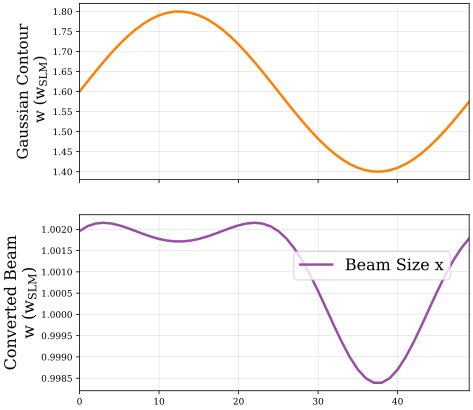

In [373]:
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7, 7))

ax.plot(ws, lw=2.5, color=CB_color_cycle[1], label="Gaussian Waist Size")

ax2.plot(beamsizexs/wx0, lw=2.5, color=CB_color_cycle[5], label="Beam Size x")
# ax2.plot(beamsizeys/wy0, lw=2.5, color=CB_color_cycle[2], label="Beam Size y")

ax.set_ylabel("Gaussian Contour\n w ($\mathrm{w_{SLM}}$)", fontsize=15, labelpad=5)
ax2.set_ylabel("Converted Beam\nw ($\mathrm{w_{SLM}}$)", fontsize=16,)

handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

legend = plt.legend(handles2, labels2, fontsize=16, ncols=1, loc=(0.55, 0.63))
# fig.savefig('./1010/Beamsize_modulation_CH.png', bbox_inches='tight', dpi=120, pad_inches=0.01);

In [20]:
def phaseHG33(wphase=0.4):
    wphase1 = wphase*wx0
    wphase2 = wphase*wy0
    zero = np.sqrt(1.5)
    x0 = np.array([-zero, 0, zero])*wphase1/np.sqrt(2)
    y0 = np.array([-zero, 0, zero])*wphase2/np.sqrt(2)
    
    phaseHG33 = np.ones((1920, 1152))
    lx = ly = l

    for i in np.arange(1920):
        for j in np.arange(1152):
            x = (i-1920/2)*lx
            y = (j-1152/2)*ly
            
            if (x0[0] < x < x0[1] and -1152*ly/2 < y < y0[0]) or (x0[2] < x < 1920*lx/2 and -1152*ly/2 < y < y0[0]) or \
            (-1920*lx/2 < x < x0[0] and y0[0] < y < y0[1]) or (x0[1] < x < x0[2] and y0[0] < y < y0[1]) or \
            (x0[0] < x < x0[1] and y0[1] < y < y0[2]) or (x0[2] < x < 1920*lx/2 and y0[1] < y < y0[2]) or \
            (-1920*lx/2 < x < x0[0] and y0[2] < y < 1152*ly/2) or (x0[1] < x < x0[2] and y0[2] < y < 1152*ly/2):
                phaseHG33[i][j] = 0
    return np.rot90(phaseHG33)

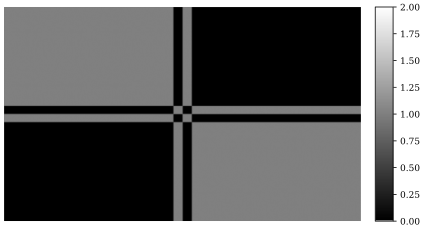

In [109]:
fig, ax = plt.subplots(figsize=(7,5))

im = ax.imshow(phaseHG33(), cmap="gray", vmin=0, vmax=2) #norm=LogNorm(vmin=0, vmax=20))
plt.grid(False)
plt.axis("off")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
cbar = fig.colorbar(im, cax=cax,)

In [1]:
field_data = HG00_0_data*np.exp(1j*phaseHG33()*np.pi)
freqxs = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(field_data.shape[1], d=x[1]-x[0]))
freqxs = freqxs.reshape(1,-1)
freqys = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(field_data.shape[0], d=y[1]-y[0]))
freqys = freqys.reshape(-1,1)
HG_00_fourier = np.fft.fftshift(np.fft.fft2(field_data, norm='forward'))
k = 2*np.pi/(1064e-9)
data = HG_00_fourier*np.exp(1j*(k**2-freqxs**2-freqys**2)**0.5*1)
HG_00_Propagated = np.fft.ifft2(data, norm='forward')
# plt.imshow(np.abs(HG_00_Propagated), )#norm=LogNorm(vmin=0, vmax=20))

fig, ax = plt.subplots(figsize=(7,5))

im = ax.imshow(np.abs(HG_00_Propagated), cmap="jet") #norm=LogNorm(vmin=0, vmax=20))
# plt.grid(False)
# plt.axis("off")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
cbar = fig.colorbar(im, cax=cax,);

NameError: name 'HG00_0_data' is not defined

In [29]:
xs = 2*np.pi*np.fft.fftshift(np.fft.rfftfreq(HG_00_fourier.shape[1], d=freqxs[:,1]-freqxs[:,0]))
xs[1] - xs[0]

9.19999999999914e-06

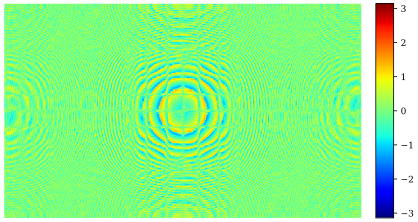

In [168]:
fig, ax = plt.subplots(figsize=(7,5))

im = ax.imshow(np.angle(HG_00_Propagated), cmap="jet") #norm=LogNorm(vmin=0, vmax=20))
plt.grid(False)
plt.axis("off")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
cbar = fig.colorbar(im, cax=cax,);

0.48657092316506384


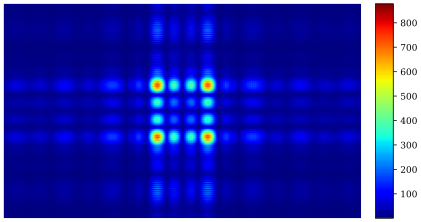

In [177]:
f = 0.5
x = np.arange(-cx, cx)*l/wx0
xx = x.reshape(1,-1)
y = np.arange(-cy, cy)*l/wy0
yy = y.reshape(-1,1)
HG_lens = HG_00_Propagated*np.exp(-1j*k/(2*f)*(xx**2+yy**2))
HG_lens_fourier = np.fft.fftshift(np.fft.fft2(HG_lens, norm='forward'))

freqxs = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(HG_lens.shape[1], d=x[1]-x[0]))
freqxs = freqxs.reshape(1,-1)
freqys = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(HG_lens.shape[0], d=y[1]-y[0]))
freqys = freqys.reshape(-1,1)

s = 1
zR = np.pi*wx0**2/(1064e-9)
s_prime = f / (1 / (s/f + (zR/f)**2/(s/f+1)) + 1)
print(s_prime)
data = HG_lens_fourier*np.exp(1j*(k**2-freqxs**2-freqys**2)**0.5*s_prime)
HG_Propagated_lens = np.fft.ifft2(data, norm='forward')

fig, ax = plt.subplots(figsize=(7,5))

im = ax.imshow(np.abs(HG_Propagated_lens), cmap="jet") #norm=LogNorm(vmin=0, vmax=20))
plt.grid(False)
plt.axis("off")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
cbar = fig.colorbar(im, cax=cax,);

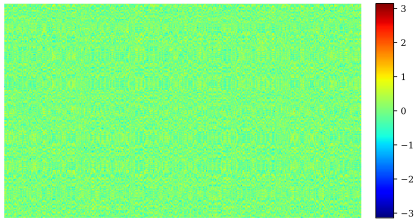

In [178]:
fig, ax = plt.subplots(figsize=(7,5))

im = ax.imshow(np.angle(HG_Propagated_lens), cmap="jet") #norm=LogNorm(vmin=0, vmax=20))
plt.grid(False)
plt.axis("off")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
cbar = fig.colorbar(im, cax=cax,);

In [146]:
ratio = 1/((zR/f)**2 + (1-s/f)**2)**0.5
# ratio = 1/((s - f)/(f-s_prime))**0.5
ratio

0.09820078727996467

(5.037658946288863+0j)
-11845.05199557546
(3.746012641299831e-29+0j)
(0.9999999999998119+0j)
(0.9999999999998155+0j)


0.2794263883969313

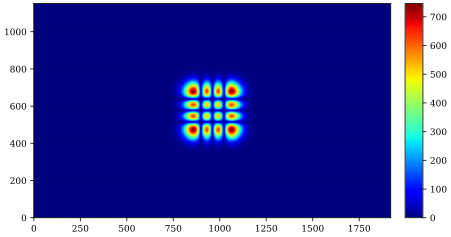

In [163]:
ratio = 0.5
q_x0 = 1j*np.pi*(wx0*ratio)**2/(1064e-9)
q_y0 = 1j*np.pi*(wx0*ratio)**2/(1064e-9)
HG33_0 = HGMode((q_y0, q_x0), n=3, m=3)
x = np.arange(-cx, cx)*l
y = np.arange(-cy, cy)*l
step = x[1]-x[0]
HG33_0_data = HG33_0.unm(y, x)

fig, ax = plt.subplots(figsize=(7,5))

im = ax.imshow(np.abs(HG33_0_data), cmap="jet") #norm=LogNorm(vmin=0, vmax=20))
# plt.grid(False)
# plt.axis("off")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
cbar = fig.colorbar(im, cax=cax,);

norm1 = np.sum(np.conj(HG_Propagated_lens)*HG_Propagated_lens * step * step)
norm2 = np.sum(np.conj(HG33_0_data)*HG33_0_data * step * step)
print(norm1)
print(norm2)
rho_nm = np.sum(np.abs(HG_Propagated_lens)*np.abs(HG33_0_data) * step * step)
eta_nm = np.abs(rho_nm*np.conj(rho_nm))
eta_nm

In [134]:
overlaps = []
w_ratios = np.linspace(0.38, 0.42, 10)
for w_ratio in w_ratios:
    field_data = phaseHG33(w_ratio)*HG00_0_data
    freqxs = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(field_data.shape[1], d=x[1]-x[0]))
    freqxs = freqxs.reshape(1,-1)
    freqys = 2*np.pi*np.fft.fftshift(np.fft.fftfreq(field_data.shape[0], d=y[1]-y[0]))
    freqys = freqys.reshape(-1,1)
    HG_00_fourier = np.fft.fftshift(np.fft.fft2(field_data, norm='forward'))
    k = 2*np.pi/(1064e-9)
    data = HG_00_fourier*np.exp(1j*(k**2-freqxs**2-freqys**2)**0.5)
    HG_00_Propagated = np.fft.ifft2(data, norm='forward')

    q_x0 = 1j*np.pi*(wx0*w_ratio)**2/(1064e-9)
    q_y0 = 1j*np.pi*(wy0*w_ratio)**2/(1064e-9)
    HG33_0 = HGMode((q_y0, q_x0), n=3, m=3)
    x = np.arange(-cx, cx)*l
    y = np.arange(-cy, cy)*l
    step = x[1]-x[0]
    HG33_0_data = HG33_0.unm(y, x)
    rho_np = np.sum(np.conj(HG_00_Propagated)*HG33_0_data * step * step)
    eta_p = np.abs(rho_np*np.conj(rho_np))
    
    overlaps.append(eta_p)
    print(f"# {eta_p}", end=" ")

In [136]:
plt.plot(w_ratios, overlaps);

In [55]:
def drop_return(df, index):
    row = df.loc[index]
    df.drop(index, inplace=True)
    return row

def get_signal(path):
    df = pd.read_csv(path, skiprows=10)
    units = drop_return(df, index=0)
    df = df.apply(lambda col:pd.to_numeric(col, errors='coerce'))
    xdata = df["Source"].values
    # freq = df["CH1"].values
    pd_signal = df["CH2"].values

    return xdata, pd_signal

In [56]:
path0 = './1005/w_amp_0.1.csv'
path1 = './1005/w_amp_0.2.csv'
path2 = './1005/w_amp_0.3.csv'
path3 = './1005/w_amp_0.4.csv'
path4 = './1005/w_amp_0.5.csv'
path5 = './1005/w_amp_0.8.csv'

xdata0, pd_00_DT0 = get_signal(path0)
xdata1, pd_00_DT1 = get_signal(path1)
xdata2, pd_00_DT2 = get_signal(path2)
xdata3, pd_00_DT3 = get_signal(path3)
xdata4, pd_00_DT4 = get_signal(path4)
xdata5, pd_00_DT5 = get_signal(path5)

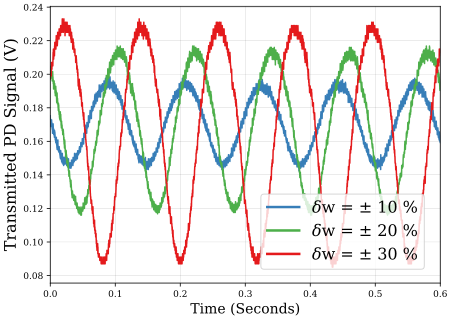

In [95]:
colors = plt.cm.get_cmap("jet", 3)

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

# popt, pcov = curve_fit(func, xdata0, pd_00_DT0, p0=[0.01, 16, 0, 0.12])
# print(abs(popt[0])/(abs(popt[0])+popt[-1]))

fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(xdata0, pd_00_DT0, color=CB_color_cycle[0], label=r"$\delta$w = $\pm$ 10 %")
ax.plot(xdata1, pd_00_DT1, color=CB_color_cycle[2], label=r"$\delta$w = $\pm$ 20 %")
ax.plot(xdata2, pd_00_DT2, color=CB_color_cycle[7], label=r"$\delta$w = $\pm$ 30 %")
# ax.plot(xdata3, pd_00_DT3, color=colors(3), label=r"$\delta$w = $\pm$ 40 %")
# ax.plot(xdata4, pd_00_DT4, color=colors(4), label=r"$\delta$w = $\pm$ 50 %")
# ax.plot(xdata5, pd_00_DT5, color=colors(5), label=r"$\delta$w = $\pm$ 80 %")

# ax.plot(xdata0, func(xdata0, *popt), '--', color="r", lw=2)


ax.set_xlabel("Time (Seconds)", fontsize=14)
ax.set_ylabel("Transmitted PD Signal (V)", fontsize=16)
ax.set_xlim([0, 0.6])
legend = plt.legend(loc=(0.54, 0.05), ncol=1, fontsize=16)

legend_lines = legend.get_lines()
for idx, line in enumerate(legend_lines):
    line.set_linewidth(2.5)

# fig.savefig('./SLM_w_contour.png', bbox_inches='tight', dpi=120, pad_inches=0.01);

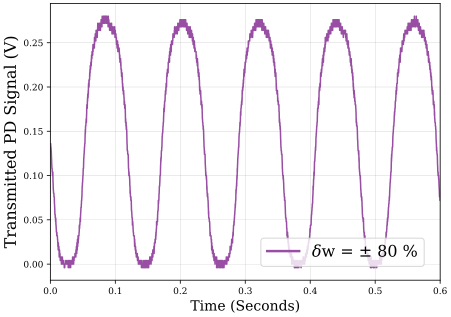

In [96]:
fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(xdata5, pd_00_DT5, color=CB_color_cycle[5], label=r"$\delta$w = $\pm$ 80 %")

# ax.plot(xdata0, func(xdata0, *popt), '--', color="r", lw=2)

ax.set_xlabel("Time (Seconds)", fontsize=14)
ax.set_ylabel("Transmitted PD Signal (V)", fontsize=16)
ax.set_xlim([0, 0.6])
legend = plt.legend(loc=(0.54, 0.05), ncol=1, fontsize=16)

legend_lines = legend.get_lines()
for idx, line in enumerate(legend_lines):
    line.set_linewidth(2.5)

# fig.savefig('./SLM_w_contour_big.png', bbox_inches='tight', dpi=120, pad_inches=0.01);